In [60]:
import matplotlib.pyplot as plt
import pandas as pd

kelly_colors = dict(vivid_yellow='#FFB300',
                    strong_purple='#803E75',
                    vivid_orange='#FF6800',
                    very_light_blue='#A6BDD7',
                    vivid_red='#C10020',
                    grayish_yellow='#CEA262',
                    medium_gray='#817066')

all_actors_df = pd.read_csv("resources/VerboseOcarina/actors.csv", sep=';')
all_transition_actors_df = pd.read_csv("resources/VerboseOcarina/transition_actors.csv", sep=';')
all_spawns_df = pd.read_csv("resources/VerboseOcarina/spawns.csv", sep=';')

actors_no_cs = all_actors_df.loc[(all_actors_df['is_cutscene'] == False) &
                                 (all_actors_df['scene'] != 68) &
                                 (all_actors_df['scene'] != 71)]

actors_no_cs_groupedby_room = actors_no_cs.groupby(['scene', 'setup', 'room'])
actors_no_cs_groupedby_setup = actors_no_cs.groupby(['scene', 'setup'])
actors_no_cs_groupedby_scene = actors_no_cs.groupby('scene')

spawns_no_cs = all_spawns_df.loc[(all_spawns_df['is_cutscene'] == False) &
                                 (all_spawns_df['scene'] != 68) &
                                 (all_spawns_df['scene'] != 71)]

spawns_no_cs_groupedby_room = spawns_no_cs.groupby(['scene', 'setup', 'room'])
spawns_no_cs_groupedby_setup = spawns_no_cs.groupby(['scene', 'setup'])
spawns_no_cs_groupedby_scene = spawns_no_cs.groupby('scene')

transit_no_cs = all_transition_actors_df.loc[(all_transition_actors_df['is_cutscene'] == False) &
                                             (all_transition_actors_df['scene'] != 68) &
                                             (all_transition_actors_df['scene'] != 71)]

transit_no_cs_groupedby_setup = transit_no_cs.groupby(['scene', 'setup'])
transit_no_cs_groupedby_scene = transit_no_cs.groupby('scene')


# Draw boxplot for population by room

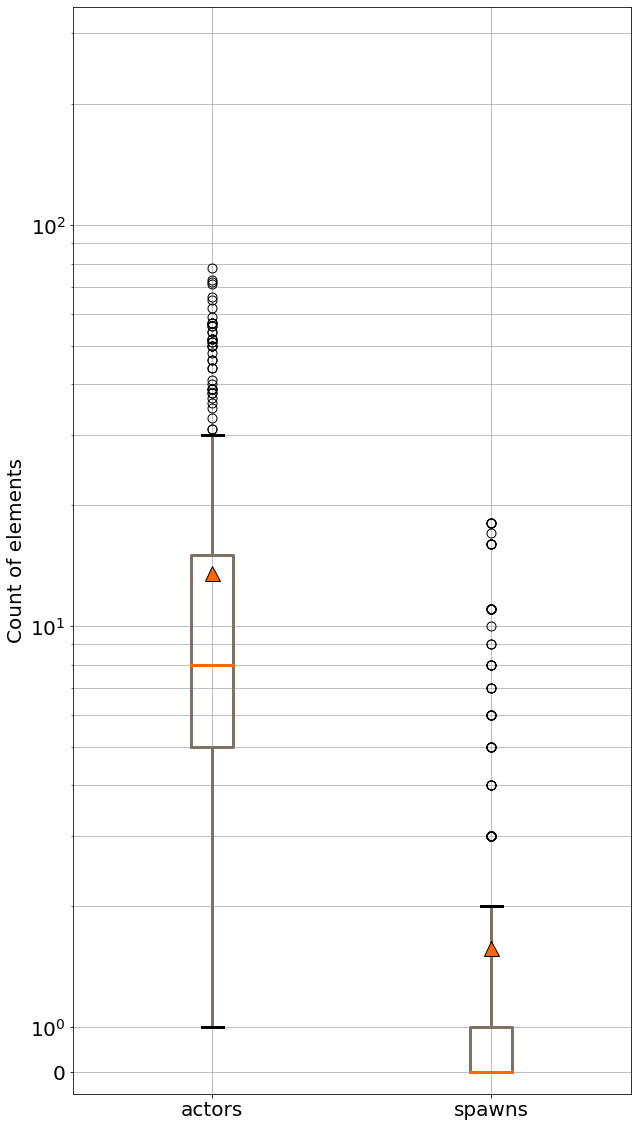

           actors      spawns
count  417.000000  417.000000
mean    13.522782    1.570743
std     14.251858    3.315234
min      1.000000    0.000000
25%      5.000000    0.000000
50%      8.000000    0.000000
75%     15.000000    1.000000
max     78.000000   18.000000


In [61]:
boxprops = dict(linewidth=3, color=kelly_colors['medium_gray'])
flierprops = dict(markersize=9)
medianprops = dict(linewidth=3, color=kelly_colors['vivid_orange'])
meanpointprops = dict(markersize=15, markeredgecolor='black', markerfacecolor=kelly_colors['vivid_orange'])
whiskerprops = dict(linewidth=3, color=kelly_colors['medium_gray'])
capprops = dict(linewidth=3)

count_per_room_df = pd.DataFrame()
count_per_room_df['actors'] = actors_no_cs_groupedby_room.count()['description']
count_per_room_df['spawns'] = spawns_no_cs_groupedby_room.count()['description']
count_per_room_df = count_per_room_df.fillna(0)
ax = count_per_room_df.boxplot(
    figsize=(10, 20),
    fontsize=20,
    showmeans=True,
    boxprops=boxprops,
    flierprops=flierprops,
    medianprops=medianprops,
    meanprops=meanpointprops,
    whiskerprops=whiskerprops,
    capprops=capprops,)
plt.yscale('symlog', linthresh=1, linscale=0.1, subs=[2, 3, 4, 5, 6, 7, 8, 9])
plt.grid(True, 'both')
plt.ylim(-0.5, 350)
ax.set_ylabel('Count of elements', fontsize=20)
plt.savefig(f"output/boxplot_by_room.pdf")
plt.show()
print(count_per_room_df.describe())

# Draw boxplot for population by scene setup

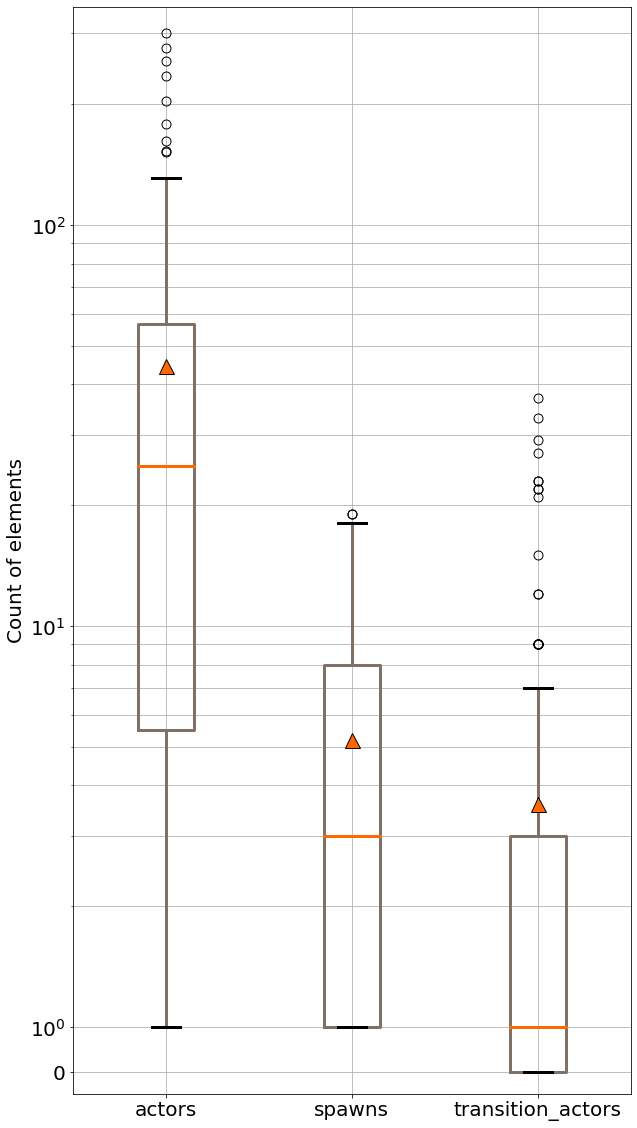

           actors      spawns  transition_actors
count  127.000000  127.000000         127.000000
mean    44.401575    5.181102           3.590551
std     57.299445    5.024412           7.061357
min      1.000000    1.000000           0.000000
25%      5.500000    1.000000           0.000000
50%     25.000000    3.000000           1.000000
75%     56.500000    8.000000           3.000000
max    301.000000   19.000000          37.000000


In [62]:
count_per_setup_df = pd.DataFrame()
count_per_setup_df['actors'] = actors_no_cs_groupedby_setup.count()['description']
count_per_setup_df['spawns'] = spawns_no_cs_groupedby_setup.count()['description']
count_per_setup_df['transition_actors'] = transit_no_cs_groupedby_setup.count()['description']
count_per_setup_df = count_per_setup_df.fillna(0)

ax = count_per_setup_df.boxplot(figsize=(10, 20),
                           fontsize=20,
                           showmeans=True,
                           boxprops=boxprops,
                           flierprops=flierprops,
                           medianprops=medianprops,
                           meanprops=meanpointprops,
                           whiskerprops=whiskerprops,
                           capprops=capprops,
                           )
yticks = [3]
plt.yscale('symlog', linthresh=1, linscale=0.1, subs=[2, 3, 4, 5, 6, 7, 8, 9])
plt.grid(True, 'both')
plt.ylim(-0.5, 350)
ax.set_ylabel('Count of elements', fontsize=20)
plt.savefig(f"output/boxplot_by_setup.pdf")
plt.show()
print(count_per_setup_df.describe())